In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd

# Try different encodings
possible_encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

# Attempt to read the CSV file with different encodings
for encoding in possible_encodings:
    try:
        df = pd.read_csv("IMDb Movies India.csv", encoding=encoding)
        print("CSV file read successfully with encoding:", encoding)
        break  # Stop trying encodings once successful
    except UnicodeDecodeError:
        print("Failed to read CSV file with encoding:", encoding)

# Now 'df' contains your DataFrame


Failed to read CSV file with encoding: utf-8
CSV file read successfully with encoding: latin1


In [6]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [9]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [10]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [11]:
# Data Filter
attribute=df.columns
print(attribute)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [12]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [13]:
shape=df.shape

In [14]:
print(f"Number of rows: {shape[0]}, Number of columns: {shape[1]}")

Number of rows: 15509, Number of columns: 10


In [15]:
genre = df["Genre"].unique()
print("Unique genres: ", genre)

Unique genres:  ['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery, Thriller' 'War' 'Sport' 'Biography, Drama, History'
 'Horror, Romance' 'Crime, Drama' 'Drama, Romance' 'Adventure, Drama'
 'Comedy, Mystery, Thriller' 'Action, Crime, Drama' 'Crime, Thriller'
 'Horror, Sci-Fi, Thriller' 'Crime, Drama, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family

In [16]:
rating = df["Rating"].value_counts()
print("Rating Distrin=bution: \n" ,rating)

Rating Distrin=bution: 
 Rating
6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 84, dtype: int64


In [17]:
df.drop_duplicates(inplace= True)

In [19]:
attributes=["Name", "Year", "Duration", "Votes", "Rating"]
df.dropna(subset=attributes, inplace= True)
missing_val=df.isna().sum()
print(missing_val)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [20]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [23]:
# Print out column names to verify
print(df.columns)

# Assuming the correct column names are different, replace 'actual_name_column' and 'actual_rating_column' with the correct column names
movie_name_rating = df[['Name', 'Rating']]

# Print first few rows to verify
print(movie_name_rating.head())


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')
                                 Name  Rating
1  #Gadhvi (He thought he was Gandhi)     7.0
3                             #Yaaram     4.4
5                ...Aur Pyaar Ho Gaya     4.7
6                           ...Yahaan     7.4
8                  ?: A Question Mark     5.6


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


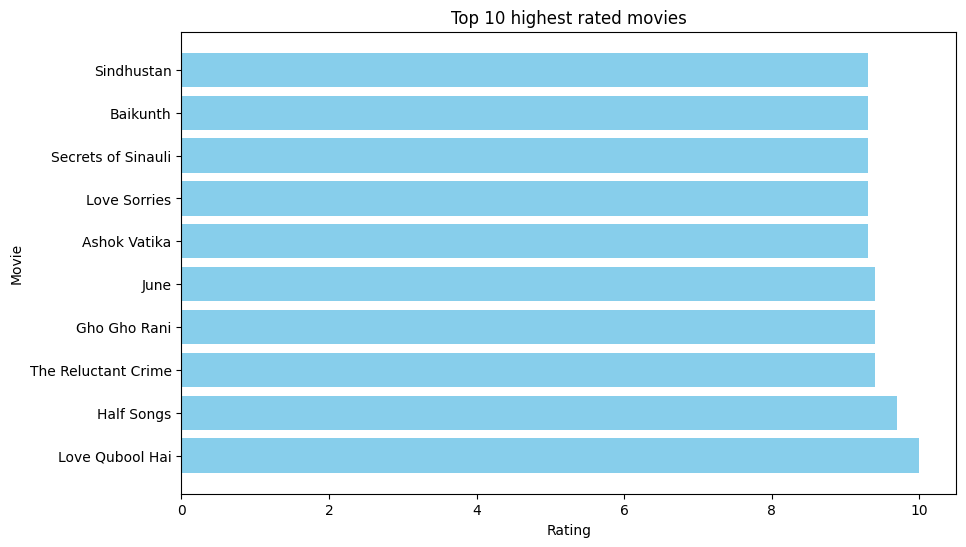

In [27]:
# Print out column names to verify
print(df.columns)

top_rated_movie = df.sort_values(by="Rating", ascending=False).head(10)

# Plotting the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(top_rated_movie["Name"], top_rated_movie["Rating"], color="skyblue")
plt.xlabel("Rating")
plt.ylabel("Movie")
plt.title("Top 10 highest rated movies")
plt.show()


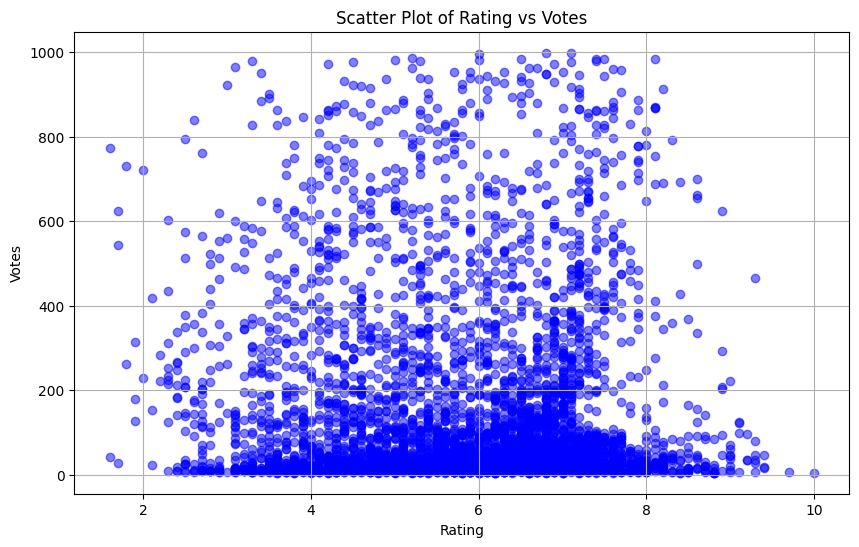

In [30]:
df["Votes"]=pd.to_numeric(df["Votes"],errors="coerce")
plt.figure(figsize=(10,6))
plt.scatter(df["Rating"],df["Votes"], alpha=0.5, color="blue")
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.title("Scatter Plot of Rating vs Votes")
plt.grid('True')
plt.show()

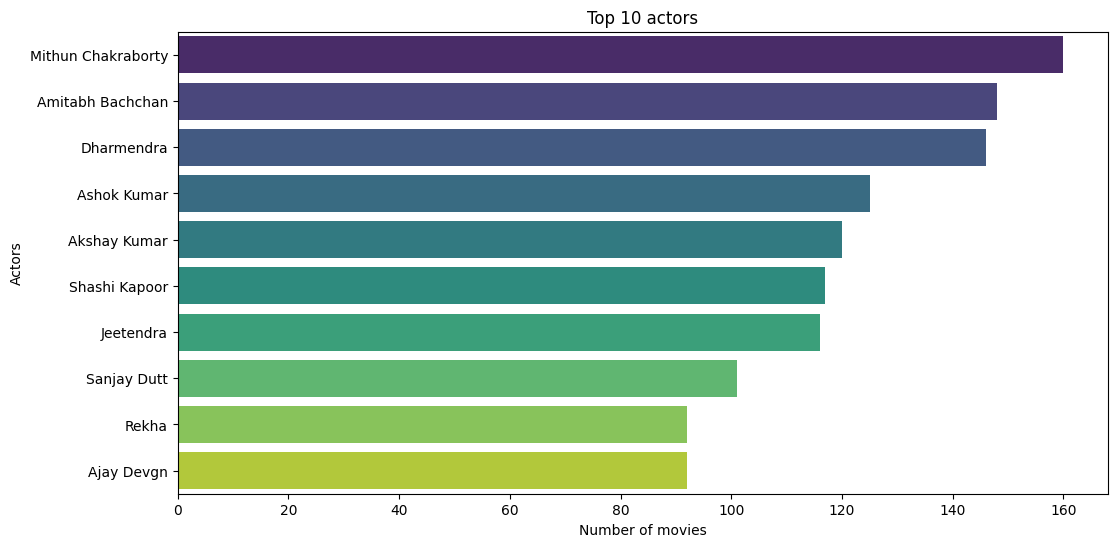

In [31]:
actors=pd.concat([df["Actor 1"],df["Actor 2"],df["Actor 3"]])
actor_counts=actors.value_counts().reset_index()
actor_counts.columns=["Actor","Number of Movies"]
plt.figure(figsize=(12,6))
sns.barplot(x="Number of Movies", y="Actor",data=actor_counts.head(10),palette="viridis")
plt.xlabel("Number of movies")
plt.ylabel("Actors")
plt.title("Top 10 actors")
plt.show()

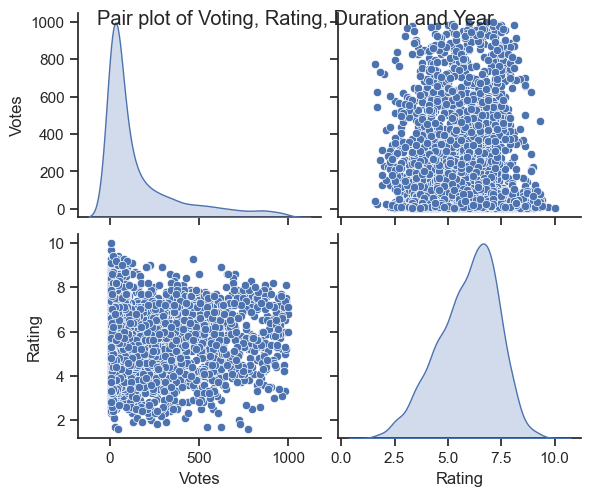

In [36]:
columns_of_interest = ["Votes", "Rating", "Duration", "Year"]
sns.set(style="ticks")
sns.pairplot(df[columns_of_interest], diag_kind="kde", palette="viridis", height=2.5, aspect=1.2)
plt.suptitle("Pair plot of Voting, Rating, Duration and Year")
plt.show()


In [38]:
#Feature Engineering
data_sort=df.sort_values(by="Votes", ascending=False)
data_sort["Vote_count_Percentile"]=data_sort["Votes"].rank(pct=True)*100
print(data_sort[["Name","Votes","Vote_count_Percentile"]])


                                       Name  Votes  Vote_count_Percentile
12569  Satyam Shivam Sundaram: Love Sublime  999.0             100.000000
5663                             Hera Pheri  998.0              99.977689
7930                            Kurukshetra  996.0              99.955377
3961                            Dishkiyaoon  986.0              99.933066
7083                             Kadvi Hawa  985.0              99.899598
...                                     ...    ...                    ...
15437                                 Ziddi    NaN                    NaN
15440                        Zila Ghaziabad    NaN                    NaN
15447                                 Zinda    NaN                    NaN
15476              Zindagi Na Milegi Dobara    NaN                    NaN
15494                              Zubeidaa    NaN                    NaN

[5851 rows x 3 columns]


In [39]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,NaN,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [43]:
df["Year"]=df["Year"].astype(str)
df["Duration"]=df["Duration"].astype(str)
df["Year"]=df["Year"].str.extract("(\d+)").astype(float)
df["Duration"]=df["Duration"].str.extract("(\d+)").astype(float)
x=df[["Year","Duration","Votes"]]
y=df["Rating"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
model=LinearRegression()

In [46]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming x_train and y_train are your training data
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Initialize the Imputer transformer
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'

# Fit the imputer on the training data and transform both the training and testing data
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Initialize and fit the model
model = LinearRegression()
model.fit(x_train_imputed, y_train)


LinearRegression()

In [48]:

x_test_imputed = imputer.transform(x_test)
y_pred = model.predict(x_test_imputed)


In [52]:
mae=mean_absolute_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)
r2=r2_score(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root mean squared error: {rmse}")
print(f"R-squared (R2) score: {r2}")

Mean Absolute Error: 1.1228060340988932
Root mean squared error: 1.3998376847750713
R-squared (R2) score: 0.040846629090468656


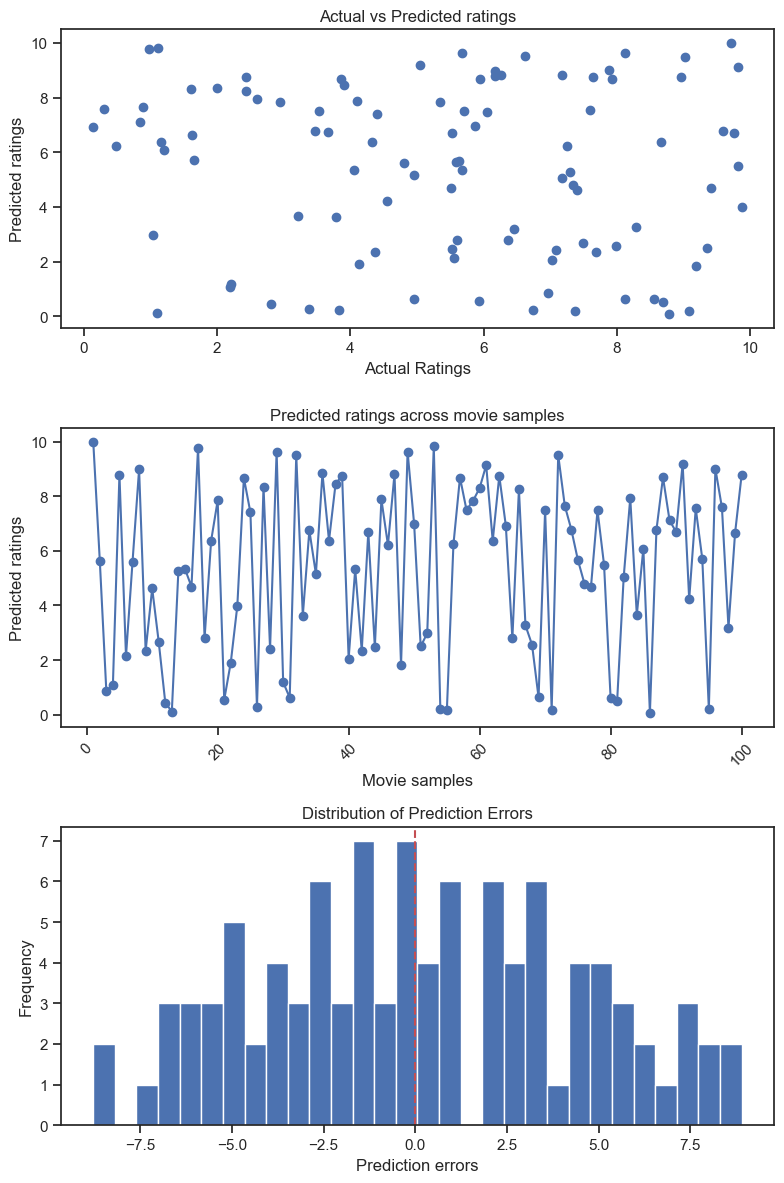

In [54]:
#Visualise:
import numpy as np
import matplotlib.pyplot as plt

y_test = np.random.rand(100) * 10
y_pred = np.random.rand(100) * 10
errors = y_test - y_pred

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Scatter plot
axs[0].scatter(y_test, y_pred)
axs[0].set_xlabel("Actual Ratings")
axs[0].set_ylabel("Predicted ratings")
axs[0].set_title("Actual vs Predicted ratings")

# Line plot
movie_samples = np.arange(1, len(y_pred) + 1)  # Corrected typo here
axs[1].plot(movie_samples, y_pred, marker="o", linestyle="-")
axs[1].set_xlabel("Movie samples")
axs[1].set_ylabel("Predicted ratings")
axs[1].set_title("Predicted ratings across movie samples")
axs[1].tick_params(axis="x", rotation=45)

# Histograms
axs[2].hist(errors, bins=30)
axs[2].set_xlabel("Prediction errors")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of Prediction Errors")
axs[2].axvline(x=0, color="r", linestyle="--")

plt.tight_layout()
plt.show()
